In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('../Resources/collision_2022_classified.csv')

# Step 2: Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(['Unnamed: 0'], axis=1)

C:\Windows\Temp\ipykernel_60740\1377513668.py:2: DtypeWarning: Columns (13,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Resources/collision_2022_classified.csv')


In [3]:
df['crash_datetime'] = pd.to_datetime(df['crash_datetime'])

C:\Windows\Temp\ipykernel_60740\4269510825.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


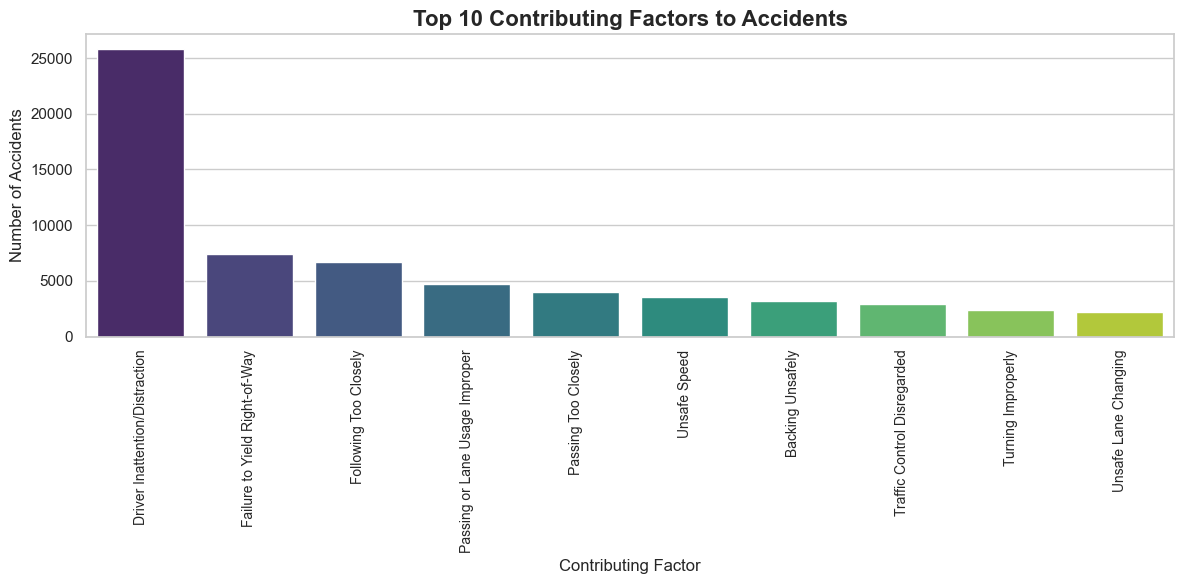

In [4]:
# Set the style of seaborn to 'whitegrid' for a clean background
sns.set_theme(style="whitegrid")

# Filter the dataframe to remove the 'Unspecified' and 'Other Vehicular' categories
df_filtered = df[~df['contributing_factor'].isin(["Unspecified", "Other Vehicular"])]

# Find the top 10 contributing factors excluding 'Unspecified' and 'Other Vehicular'
order = df_filtered['contributing_factor'].value_counts().nlargest(10).index

# Set up the size of the figure
plt.figure(figsize=(12, 6))

# Create the count plot
sns.countplot(
    x='contributing_factor',
    data=df_filtered,
    order=order,
    palette='viridis'  # A colorblind-friendly palette
)

# Set the title and labels with a professional appearance
plt.title('Top 10 Contributing Factors to Accidents', fontsize=16, fontweight='bold')
plt.xlabel('Contributing Factor', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)

# Tight layout often provides a better layout of the plots
plt.tight_layout()

# Save the figure if necessary
plt.savefig('../static/images/top_contributing_factors.png', dpi=300)

# Show the plot
plt.show()

The plot shows a count of accidents sorted by contributing factors, arranged in descending order. The x-axis lists the contributing factors to accidents, while the y-axis quantifies the number of accidents associated with each factor. “Driver inattention/Distraction" is at the greatest height, representing the most prevalent contributing factor to accidents within the dataset. This factor significantly surpasses the others, indicating it is a primary concern for road safety interventions.

In [5]:
# Rename Station Wagon/Sport Utility Vehicle  as Station Wagon/\nSport Utility Vehicle
df['vehicle_type_code_1'] = df['vehicle_type_code_1'].replace('Station Wagon/Sport Utility Vehicle', 'Station Wagon/\nSport Utility Vehicle')
df['vehicle_type_code_1'].value_counts()

vehicle_type_code_1
Unspecified                              103644
Sedan                                        69
Station Wagon/\nSport Utility Vehicle        49
Taxi                                          6
Bike                                          4
E-Bike                                        2
Box Truck                                     2
Motorscooter                                  1
Ambulance                                     1
Motorcycle                                    1
E-Scooter                                     1
UTILITY                                       1
Pick-up Truck                                 1
Name: count, dtype: int64

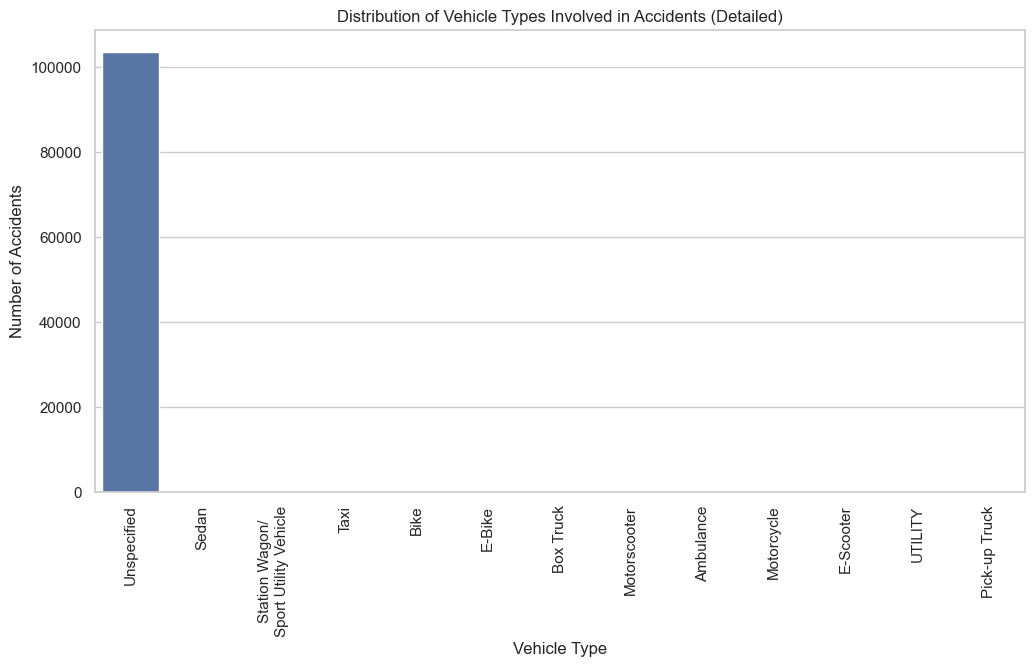

In [6]:
## Distribution of vehicle_type (detailed)

plt.figure(figsize=(12, 6))
sns.countplot(x='vehicle_type_code_1', data=df, order=df['vehicle_type_code_1'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Vehicle Types Involved in Accidents (Detailed)')
plt.show()

This bar chart illustrates the distribution of different types of vehicles involved in accidents. Sedans lead, followed closely by station wagons/sport utility vehicles, indicating these vehicle types are more frequently involved in accidents, which could correlate with their prevalence on the roads. Other types, like taxis, bikes, and e-bikes, have a smaller representation, suggesting fewer incidents. Notably, there are very few accidents involving more specialized vehicles such as ambulances and e-scooters.

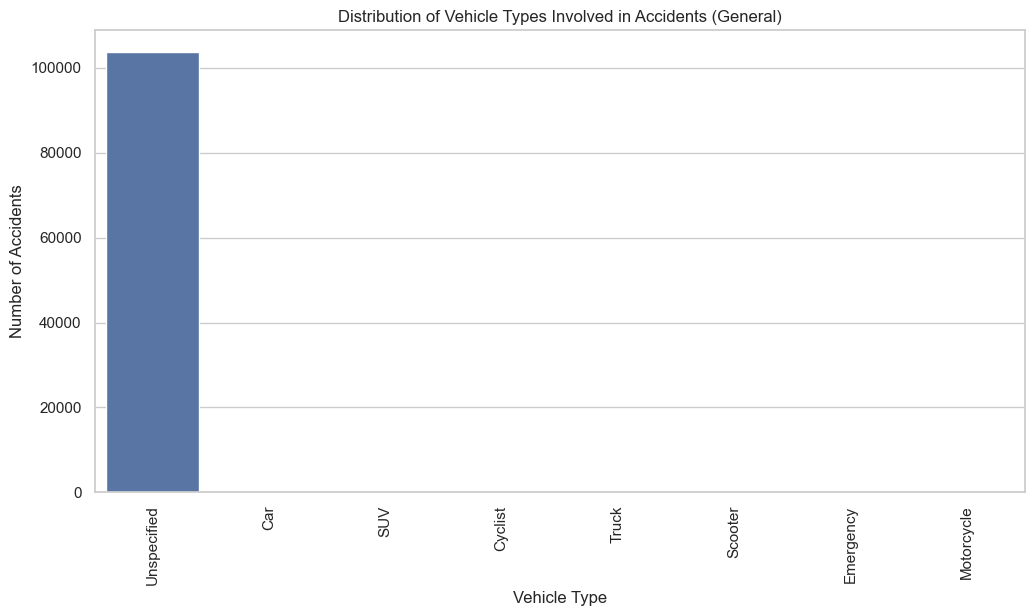

In [7]:
## Distribution of vehicle_type (general)
vehicle_type_mapping = {
    'Ambulance': 'Emergency',
    'Bike': 'Cyclist',
    'Box Truck': 'Truck',
    'E-Bike': 'Cyclist',
    'E-Scooter': 'Scooter',
    'Motorcycle': 'Motorcycle',
    'Motorscooter': 'Scooter',
    'Pick-up Truck': 'Truck',
    'Sedan': 'Car',
    'Station Wagon/\nSport Utility Vehicle': 'SUV',
    'Taxi': 'Car',
    'UTILITY': 'Truck'
}

df['vehicle_type_group'] = df['vehicle_type_code_1'].replace(vehicle_type_mapping)

plt.figure(figsize=(12, 6))
sns.countplot(x='vehicle_type_group', data=df, order=df['vehicle_type_group'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Vehicle Types Involved in Accidents (General)')
plt.savefig('../static/images/distribution_vehicle_type.png')
plt.show()

The chart presents a generalized overview of the types of vehicles most often implicated in traffic incidents. Cars are the most common vehicle type involved, followed by SUVs, indicating a higher incidence of accidents with these vehicles. The involvement of cyclists is also significant, suggesting a potential area of focus for improving road safety for non-motorized traffic. Trucks, scooters, emergency vehicles, and motorcycles are involved in accidents less frequently, according to this data. It's important for urban planners and traffic safety officials to consider these patterns when designing interventions to reduce traffic accidents.

C:\Windows\Temp\ipykernel_60740\3651044103.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0],
C:\Windows\Temp\ipykernel_60740\3651044103.py:15: UserWarning: The palette list has more values (13) than needed (8), which may not be intended.
  sns.countplot(ax=axes[0],
C:\Windows\Temp\ipykernel_60740\3651044103.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1],


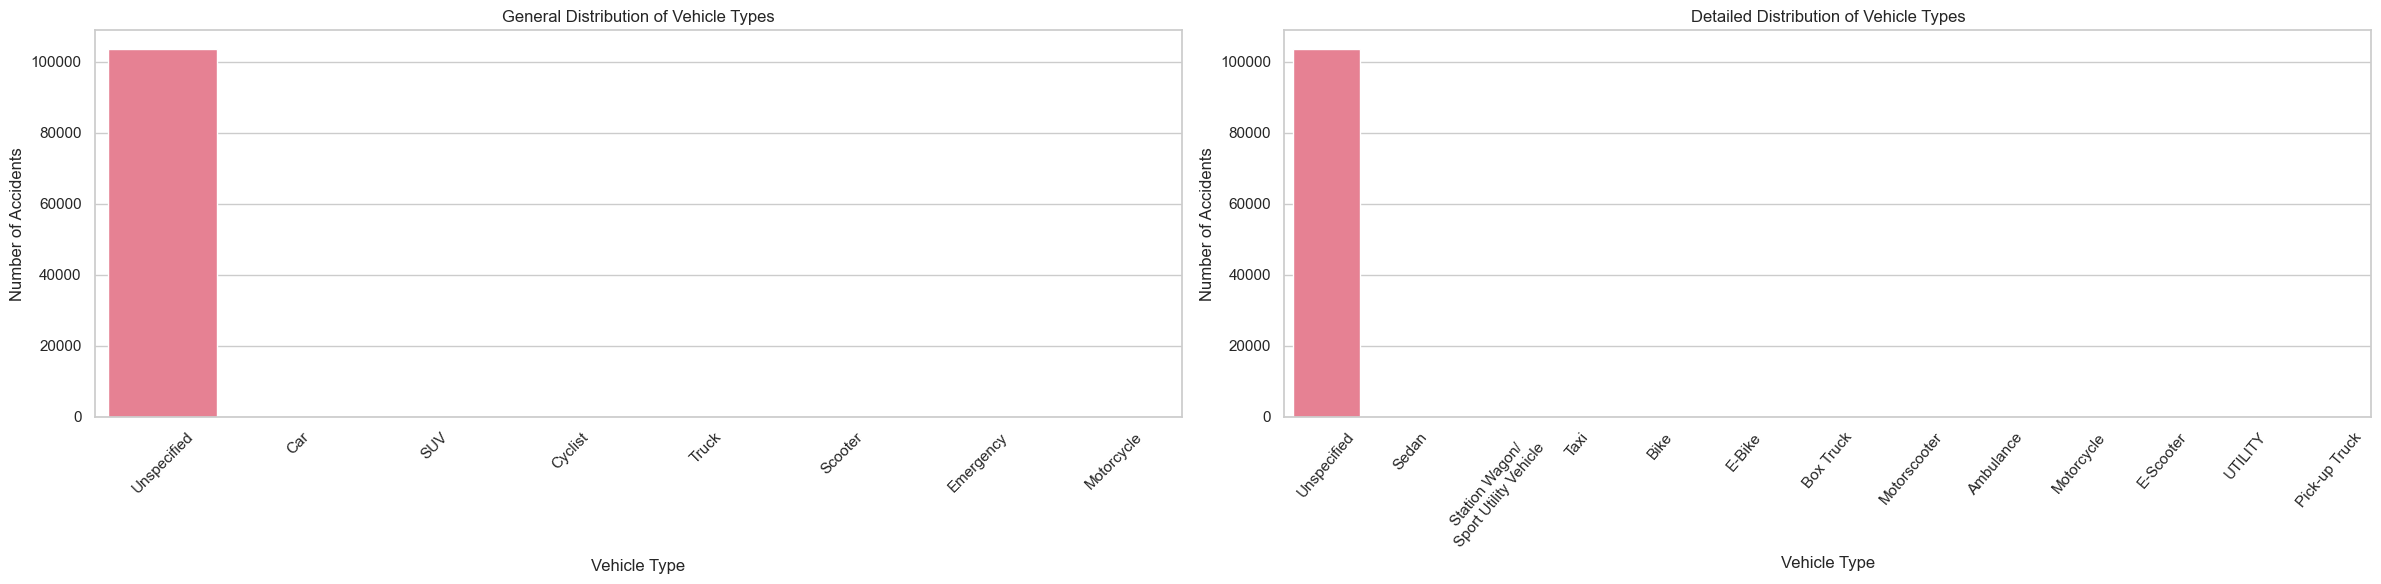

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply your mapping
df['vehicle_type_group'] = df['vehicle_type_code_1'].replace(vehicle_type_mapping)

# Set up the matplotlib figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# Define a color palette
max_categories = max(df['vehicle_type_group'].nunique(), df['vehicle_type_code_1'].nunique())
palette = sns.color_palette("husl", max_categories)

# First subplot for the general distribution
sns.countplot(ax=axes[0],
              x='vehicle_type_group',
              data=df,
              order=df['vehicle_type_group'].value_counts().index,
              dodge=False,
              palette=palette)
axes[0].set_title('General Distribution of Vehicle Types')
axes[0].set_xlabel('Vehicle Type')
# adjust x-axis label position
axes[0].xaxis.labelpad = 45
axes[0].set_ylabel('Number of Accidents')
axes[0].tick_params(axis='x', rotation=45)

# Second subplot for the detailed distribution
sns.countplot(ax=axes[1],
              x='vehicle_type_code_1',
              data=df,
              order=df['vehicle_type_code_1'].value_counts().index,
              dodge=False,
              palette=palette)
axes[1].set_title('Detailed Distribution of Vehicle Types')
axes[1].set_xlabel('Vehicle Type')
axes[1].set_ylabel('Number of Accidents')
axes[1].tick_params(axis='x', rotation=50)

# Adjust layout to prevent overlap and display all figure components properly
plt.tight_layout()

# Save the figure if needed
plt.savefig('../static/images/distribution_vehicle_type_comparison.png')

# Display the plots
plt.show()


The graph presents a side-by-side comparison of vehicle types involved in accidents, categorized into general and detailed distributions. On the left, the 'General Distribution' chart simplifies vehicle types into broader categories such as 'Car' and 'SUV', showing that cars are the most frequently involved in accidents. On the right, the 'Detailed Distribution' provides a more nuanced view, breaking down the categories further—'Sedan', 'Station Wagon/Sport Utility Vehicle', and so forth. Both graphs highlight that standard passenger vehicles like sedans and SUVs are the most common in accidents, suggesting they are either more numerous on the roads or more prone to incidents. The detailed chart also illustrates the involvement of other specific vehicle types, like taxis and motorcycles, providing a clearer picture for targeted road safety strategies.

C:\Windows\Temp\ipykernel_60740\223289156.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='crash_day_of_week', data=df, palette='viridis')
C:\Windows\Temp\ipykernel_60740\223289156.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x='crash_hour_category', data=df, order=hour_category_order, palette='viridis')


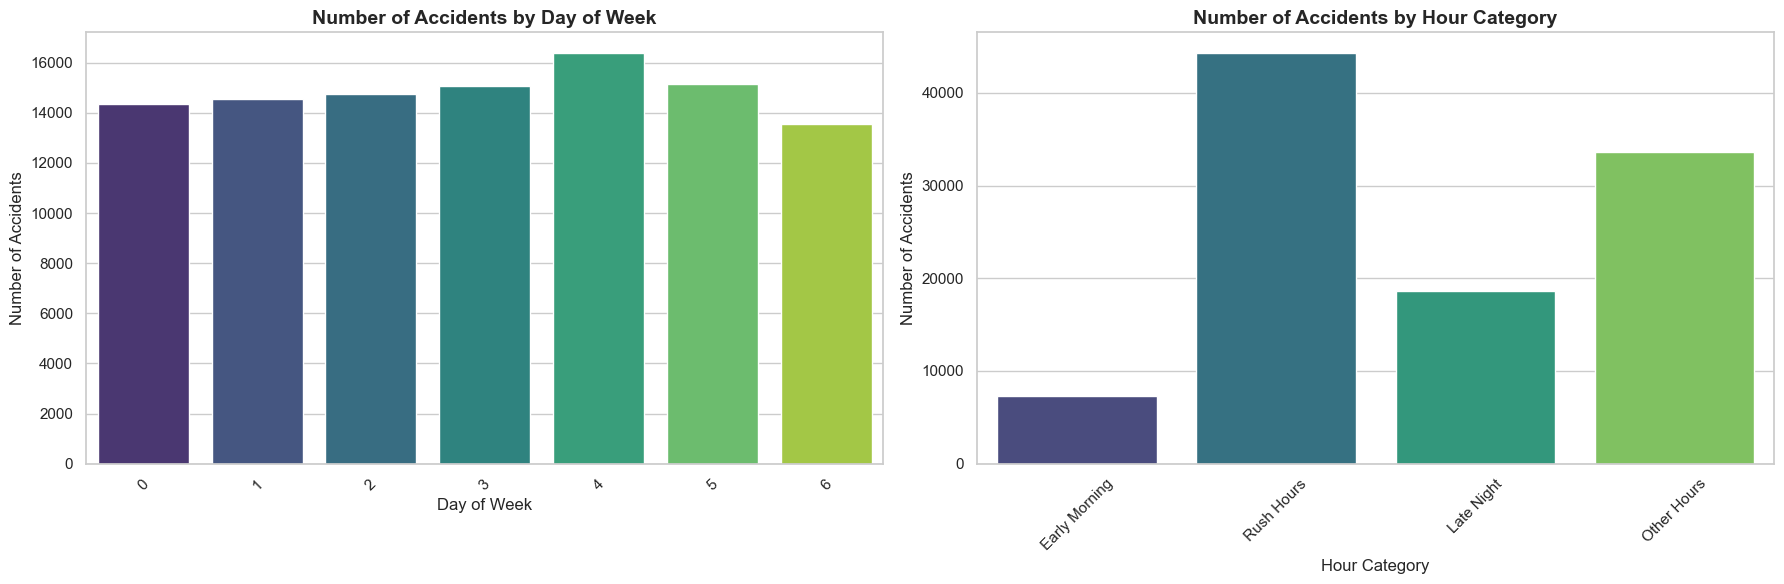

In [9]:
# Set the style of seaborn to 'whitegrid' for a professional look
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# First subplot for the number of accidents by day of the week
sns.countplot(ax=axes[0], x='crash_day_of_week', data=df, palette='viridis')
axes[0].set_title('Number of Accidents by Day of Week', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Day of Week', fontsize=12)
axes[0].set_ylabel('Number of Accidents', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Second subplot for the number of accidents by hour category
hour_category_order = ['Early Morning', 'Rush Hours', 'Late Night', 'Other Hours']
sns.countplot(ax=axes[1], x='crash_hour_category', data=df, order=hour_category_order, palette='viridis')
axes[1].set_title('Number of Accidents by Hour Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hour Category', fontsize=12)
axes[1].set_ylabel('Number of Accidents', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap and display all figure components properly
plt.tight_layout()

# Save the figure if needed
plt.savefig('../static/images/accidents_by_time_analysis.png', dpi=300)

# Display the plots
plt.show()

The dual graphs depict the number of accidents categorized by both the day of the week and time of day. In the first graph, the distribution of accidents is fairly consistent across the days, with slight variations, suggesting no single day is dramatically safer or more dangerous. In the second graph, there's a clear pattern showing that most accidents occur during 'Other Hours,' which includes daytime and evening, followed by 'Rush Hours,' indicating high traffic volume likely contributes to more accidents. 'Late Night' and 'Early Morning' periods see fewer accidents, which could be due to lower traffic volumes during these times. The data suggest that interventions to improve road safety could be most impactful during peak traffic hours and throughout most of the day.

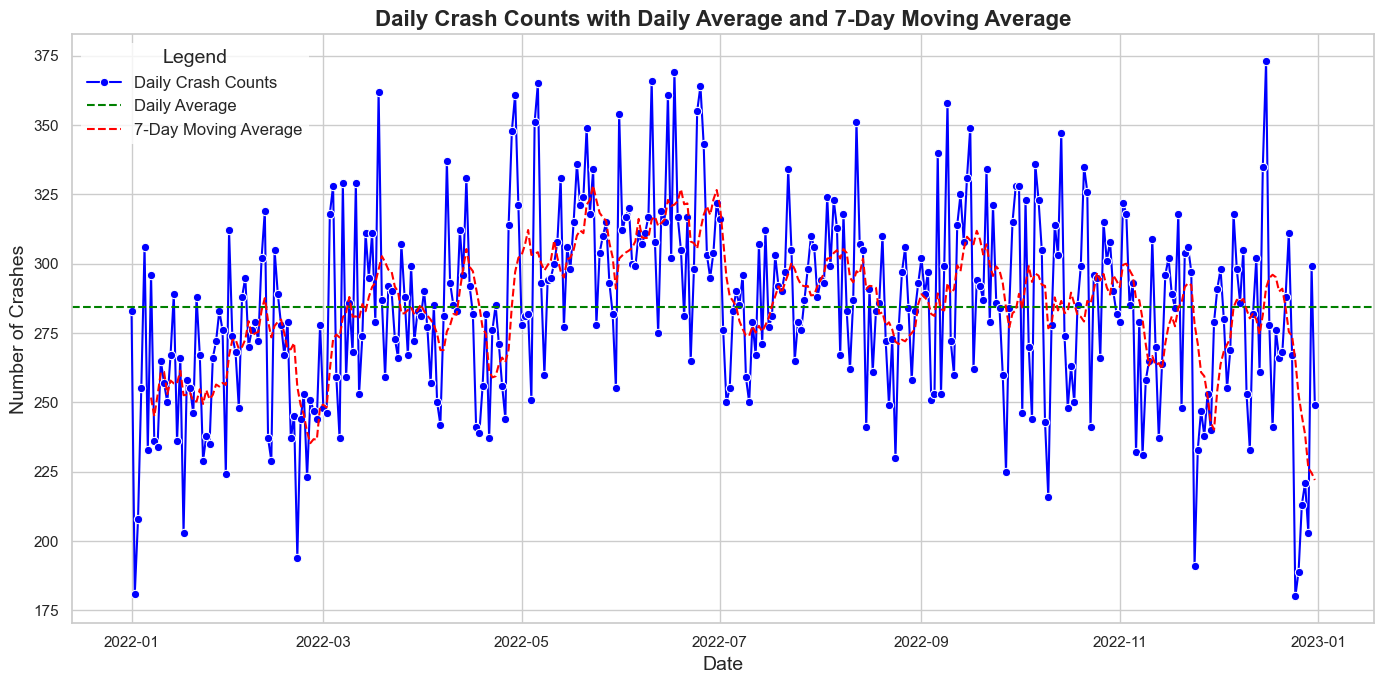

In [10]:
# Setting a professional theme with seaborn
sns.set_theme(style="whitegrid")

# Assuming 'crash_datetime' is in datetime format in 'df'
# Calculate the daily crash counts
daily_counts = df.groupby(df['crash_datetime'].dt.date).size()

# Compute the overall daily average
daily_avg = daily_counts.mean()

# Calculate the 7-day moving average
moving_avg_7d = daily_counts.rolling(window=7).mean()

# Plot the daily crash counts
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_counts, marker='o', linestyle='-', label='Daily Crash Counts', color='blue')

# Plot the overall daily average
plt.axhline(y=daily_avg, color='green', linestyle='--', label='Daily Average')

# Plot the 7-day moving average
sns.lineplot(data=moving_avg_7d, color='red', linestyle='--', label='7-Day Moving Average')

# Set title and labels with increased font size for professionalism
plt.title('Daily Crash Counts with Daily Average and 7-Day Moving Average', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)

# Improve layout for a better fit and to avoid cutting off labels/titles
plt.tight_layout()

# Enhance the legend with a frame and remove the frame's edge
plt.legend(title='Legend', frameon=True, edgecolor='none', fontsize=12, title_fontsize=14)

# Optionally, save the figure with high DPI for a clear, high-resolution output
plt.savefig('../static/images/daily_crash_counts.png', dpi=300)

# Show the plot
plt.show()

The time series chart illustrates daily crash counts over a period, overlaid with both a daily average (green dashed line) and a 7-day moving average (red dashed line). The blue dots represent daily crash data, with spikes indicating days with higher-than-average crashes. The 7-day moving average smooths out daily fluctuations, providing a clearer view of the overall trend, which helps identify patterns or shifts in accident frequency over time. The daily average appears relatively constant, serving as a benchmark against which daily and weekly variations can be assessed. Peaks above the daily average suggest days with unusually high accident counts, while troughs indicate fewer accidents than average.

In [11]:
# seasonality by month
seasonality_data = df.pivot_table(index='month', columns='year', values='crash_datetime', aggfunc='count')
monthly_avg = df.groupby('month').size().mean()
ax= seasonality_data.plot(marker='o', figsize=(12, 6))
ax.axhline(y=monthly_avg, color='r', linestyle='--', label='Monthly Average')
plt.title('Crash Count Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.legend(title='Year')
plt.show() 

KeyError: 'month'

The line graph displays the monthly crash count for 2022. The x-axis represents the month of the year, while the y-axis shows the number of crashes. The blue line indicates the actual number of crashes each month, while the red dashed line represents the monthly average crash count for the year.

From the graph, there's a noticeable fluctuation in crash numbers, with peaks suggesting months where crashes were more frequent. Specifically, there’s a significant peak around the middle of the year, indicating a month with an exceptionally high number of crashes compared to the rest. Towards the end of the year, there’s a sharp decline in the number of crashes, followed by a slight increase.

The monthly average crash count, depicted by the red dashed line, provides a benchmark to compare the actual crash counts against. Months that lie above this line had a higher-than-average number of crashes, whereas months below it had fewer crashes than average. This information could be valuable for analyzing seasonal effects on road safety and could help in planning safety measures or resource allocation for traffic management.

In [ ]:
## heatmap - correlation between month and day for the number of crashes
# Create a pivot table to count the number of crashes for each month and day of the week
heatmap_data = df.pivot_table(index='day_of_week', columns='month', values='crash_datetime', aggfunc='count', fill_value=0)

# Reorder the days of the week for better visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Plot the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, cbar_kws={'label': 'Number of Crashes'})
plt.savefig('../static/images/heatmap_by_weekday_month.png')
plt.show()

NameError: name 'df' is not defined

In [ ]:
# go check weekday and hour analysis

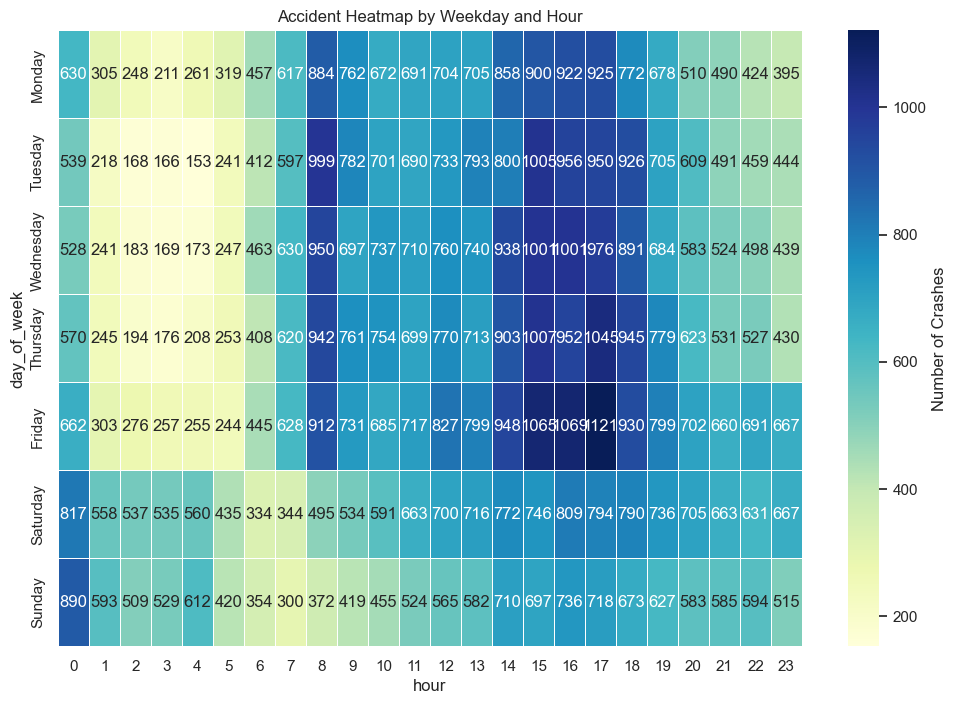

In [ ]:
## heatmap - correlation between week and hour for the number of crashes
# Create a pivot table to count the number of crashes for each day of the week and hour of the day
heatmap_data = df.pivot_table(index='day_of_week', columns='hour', values='crash_datetime', aggfunc='count', fill_value=0)

# Reorder the days of the week for better visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Plot the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, cbar_kws={'label': 'Number of Crashes'})
plt.title('Accident Heatmap by Weekday and Hour')
plt.savefig('../static/images/heatmap_by_weekday_hour.png')
plt.show()

The heatmap displays the number of accidents by weekday and hour, providing a detailed temporal breakdown of when accidents occur. Darker shades indicate higher accident counts, revealing that midweek days, particularly during the hours of 3 pm to 6 pm, see the highest frequency of accidents, possibly due to rush hour traffic. Saturday evenings also show an elevated number of accidents. In contrast, the early morning hours across all days have the lowest occurrence, likely due to reduced traffic. This visualization underscores the critical times when road safety measures could be intensified to prevent accidents, especially during the busiest hours of the week.

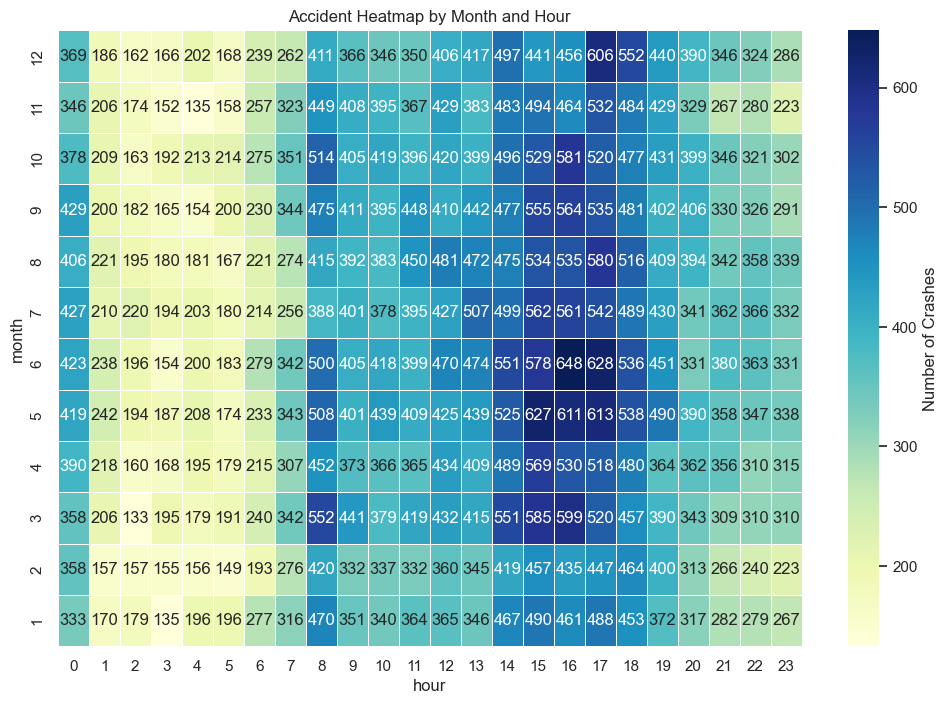

In [ ]:
## heatmap - correlation between month and hour for the number of crashes
# Create a pivot table to count the number of crashes for each month and hour of the day
heatmap_data = df.pivot_table(index='month', columns='hour', values='crash_datetime', aggfunc='count', fill_value=0)

# Reorder the days of the week for better visualization
month_order = np.arange(12,0,-1)
heatmap_data = heatmap_data.reindex(month_order)

# Plot the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, cbar_kws={'label': 'Number of Crashes'})
plt.title('Accident Heatmap by Month and Hour')
plt.savefig('../static/images/heatmap_by_month_hour.png')
plt.show()

In [ ]:
# go check weekday and hour analysis